<a href="https://colab.research.google.com/github/KhuramC/SoftwareTutorials/blob/main/Creating_A_Single_Cell_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating A Single Cell in NEURON
This lab will go over how to create a cell in NEURON, including its soma, dendrites, and axon. It will also go over how to do a voltage/current clamp and go over average values for properties of the cell.

#Components of a Neuron
Before we get to simulating a neuron, we need to know what to put in the soma of the neuron.
Create a list of all the necessary components of the soma and then draw the

1.   Create a list of the all necessary components for the soma.
2.   Draw the soma and label it with all of the components.
Hint: Draw the electrical circuit of the soma and show the 1:1 pairing to help make sure you have everything.

In the meantime, we will install NEURON and import some libraries that will be useful later. A refresher on the electrical circuit model and how neurons are electrical circuits is provided below.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 22.1 MB/s eta 0:00:00


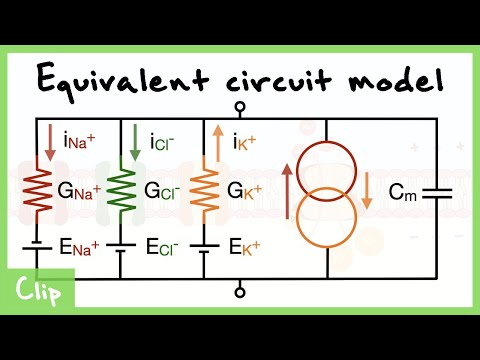

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
  !pip install neuron

from IPython.display import YouTubeVideo
YouTubeVideo('LdumhvDBpzQ')

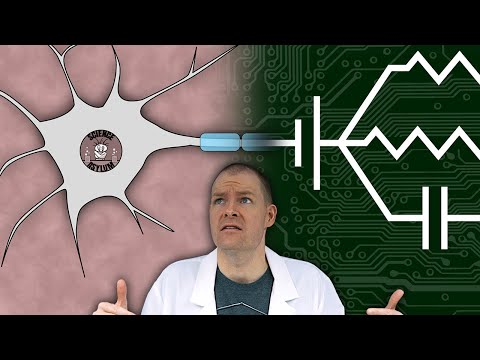

In [2]:
YouTubeVideo('YQsSrW5oX80')

In [3]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
h.load_file('stdrun.hoc')

1.0

# Components of a Neuron Continued
Your drawing should highlight the current injection into the soma, the neuron as a capacitor with liquid plates, the leak channel acting as a resistor and battery based off its reversal potential, amongst a couple of more concepts. An example of a drawing of the biological model of a neuron is given here:
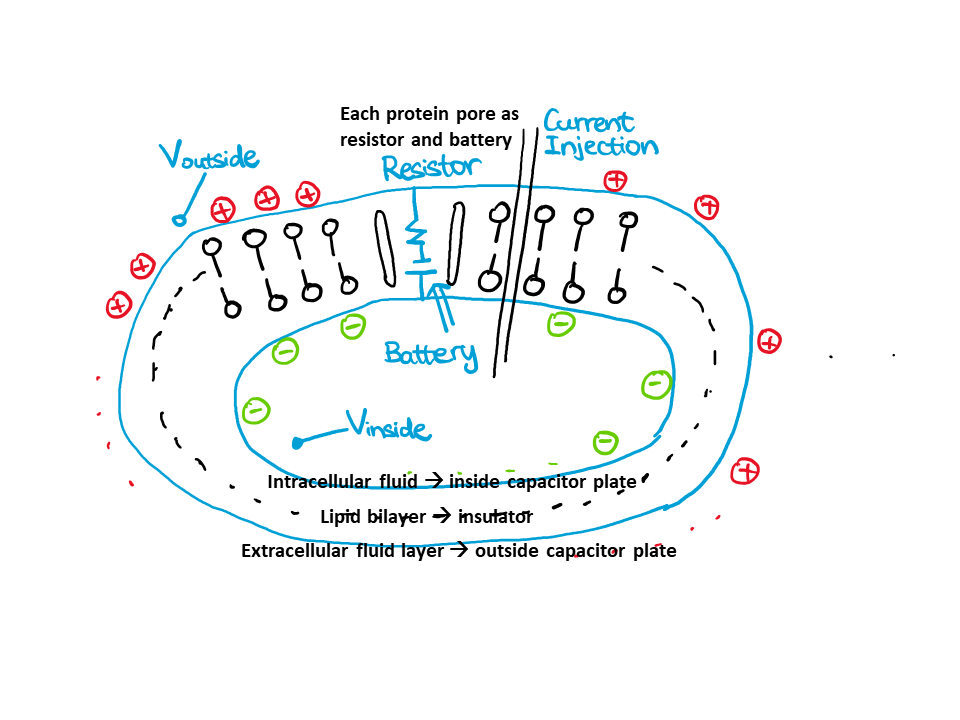

# From Drawings to Code
So how do we create the soma with these things within NEURON? It's actually very simple. NEURON defines parts of the cell as sections. NEURON defines sections as cylindrical sections, with a diameter and a length.  A dendrite would be one section, the soma another, and and axon as the last. When created, such sections are populated by default values.

![image](https://raw.githubusercontent.com/chenziao/Software_Tutorials_Colab/main/S1_PassiveMembrane/cylinder.png)

Every section can then be further subdivided into segments, which are equally lengthed segments that divide the section. Since nothing special is occuring in this notebook, we will divide the soma into three segments. We will also manually set the soma's diameter to be 20 microns.



In [4]:
soma = h.Section(name='soma') #creates soma
soma.nseg = 3 #defines how many segments to divide soma into
print("The default length is " + str(soma.L) + " microns")
print("The default diameter is " + str(soma.diam) + " microns")
print("The default capacitance is " + str(soma.cm) + " microFarad / cm^2")
print("The default cytoplasmic resistivity is " + str(soma.Ra) + " ohm-cm")
soma_length = soma.L
soma.diam = 20




The default length is 100.0 microns
The default diameter is 500.0 microns
The default capacitance is 1.0 microFarad / cm^2
The default cytoplasmic resistivity is 35.4 ohm-cm


These values are unrealistic for mammalian neurons since they come from Hodgkin and Huxley's experiments with a squid giant axon. However, we can always change them to something different.

Typical length values: 5 - 100 microns

Typical diameter values:

Typical capacitance values:

Typical cytoplasmic resistivity values:

# Graphing Soma Morphology

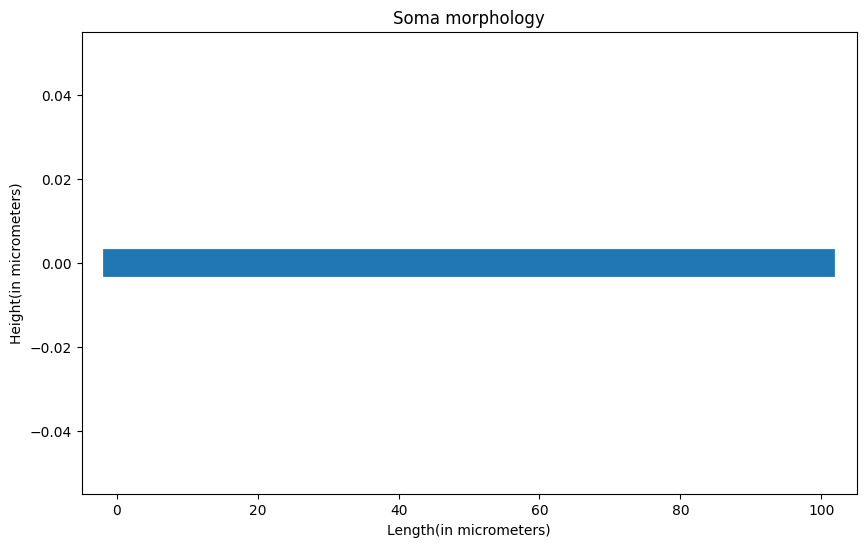

In [5]:
soma.pt3dadd(0,0,0,soma.diam)
soma.pt3dadd(soma_length,0,0,soma.diam)
soma_xcoords=[]
soma_ycoords=[]
for i_3d in range(soma.n3d()): # for 3d coordinate index in range(number of 3d coordinates)
  soma_xcoords.append(soma.x3d(i_3d)) # print x3d coordinate
  soma_ycoords.append(soma.y3d(i_3d))

 #Create the plot
plt.figure(figsize=(10, 6))
plt.plot(soma_xcoords, soma_ycoords, linewidth= soma.diam)

# Add title and labels
plt.title('Soma morphology')
plt.xlabel('Length(in micrometers)')
plt.ylabel('Height(in micrometers)')
# Show the plot
plt.show()

# Adding Leak/Passive Channels
One might notice that there is many things missing from our model so far. We have no channels, and as a result there is not even a resting membrane potential. So first, let's add the passive/leak channels to our soma.


In [6]:
soma.insert('pas') #inserts passive channel
print("Default E_leak = " +str(soma.e_pas) + " mV")
print("Default g_leak = " + str(soma.g_pas) + " S/cm^2")

Default E_leak = -70.0 mV
Default g_leak = 0.001 S/cm^2


The resting membrane potential is just e_leak. In this case, the default values are realistic.

Typical E_leak values:

Typical g_leak values:

# Adding More Sections
A neuron is more than just a soma, why not add something else, like an axon.
An axon is also just a section and can be created in the same way, but it does need to be connected to the soma. Here we connect the axon to the end(soma(1)) of the soma and make it half as thick as the soma.

In [7]:
axon = h.Section('axon')

axon.diam = soma.diam/2
axon.nseg = 3
axon.connect(soma(1))
h.topology()




|---|       soma(0-1)
     `--|       axon(0-1)



1.0

# Graphing Axon Morphology

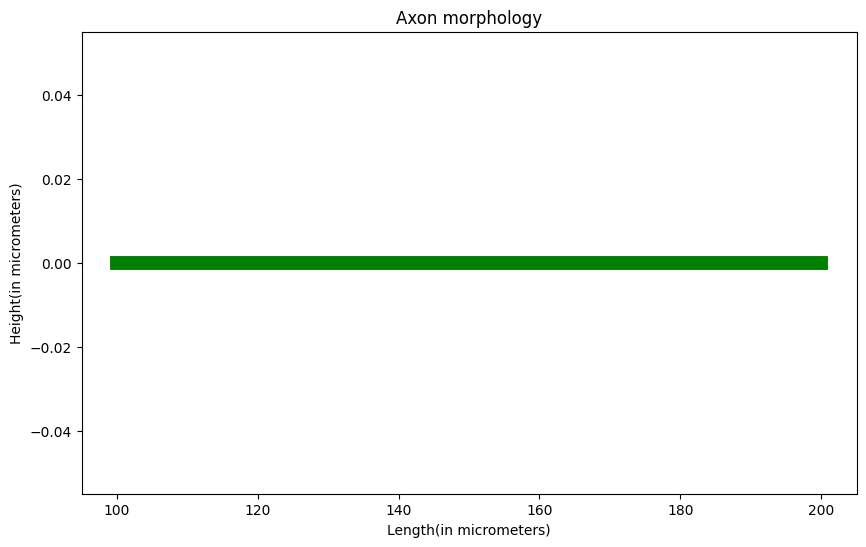

In [8]:
length = axon.L
axon.pt3dadd(soma_length,0,0,axon.diam)
axon.pt3dadd(soma_length + length,0,0,axon.diam)
axon_xcoords=[]
axon_ycoords=[]
for i_3d in range(axon.n3d()): # for 3d coordinate index in range(number of 3d coordinates)
  axon_xcoords.append(axon.x3d(i_3d)) # print x3d coordinate
  axon_ycoords.append(axon.y3d(i_3d))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(axon_xcoords, axon_ycoords, linewidth= axon.diam, color = 'green')

# Add title and labels
plt.title('Axon morphology')
plt.xlabel('Length(in micrometers)')
plt.ylabel('Height(in micrometers)')
# Show the plot
plt.show()

#Graphing Full Cell Morphology

<function matplotlib.pyplot.show(close=None, block=None)>

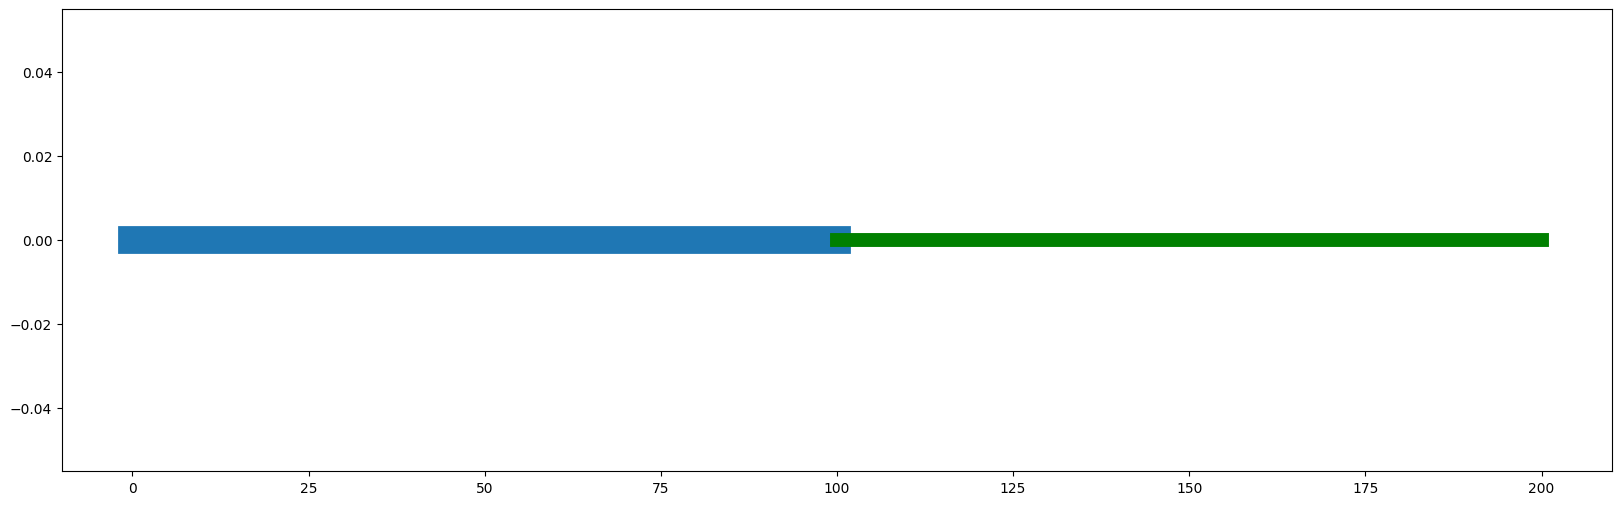

In [9]:
plt.figure(figsize=(20, 6))
plt.plot(soma_xcoords,soma_ycoords, linewidth = soma.diam)
plt.plot(axon_xcoords,axon_ycoords, linewidth = axon.diam, color = 'green')
plt.show

# Voltage Clamp
A voltage clamp holds the voltage at a steady state value and is used to measure the current. These are very simple to implement within NEURON. One just needs to state where in the soma it is being injected on  a 0-1 scale, where 0 is all the way to left, 0.5 is the middle, and 1 is all the way to right. One also needs to define how long it will do this for and at what voltage to clamp it to. We will be voltage clamping the soma.

In [10]:
vc = h.VClamp(soma(0.5)) #middle of soma
vc.dur[0] = 1000 #ms
vc.amp[0] = -10 #mV

# Current Clamp
A current clamp does the opposite and injects a steady current into the soma and is typically used to measure the change in voltage. Current Clamps have an extra parameter: delay. This just says how long to delay until the the current is injected. It allows for the change in voltage to be better illustrated. It is best to only have one clamp on at a time, so we will be showcasing voltage clamp.

In [11]:
#ic = h.IClamp(soma(0.5)) # middle of soma
#ic.dur = 1000 #ms
#ic.amp = 70 #nA
#ic.delay = 100 #ms

# Adding Active Channels
We have everything to model a passive membrane. However, active channels do exist, and can also be added. We will be inserting Hodgkin-Huxley channels to the axon, so their defaults will also be based off the squid giant axon. These hh channels also include a leak channel based off the squid giant axon. We will be inserting the hh channels to the axon just to show that you can insert channels into any sections.



In [12]:
axon.insert('hh') #insert Hodgkin-Huxley channels
print("Default El_hh = " +str(axon.el_hh) + " mV")
print("Default gl_hh = " + str(axon.gl_hh) + " S/cm^2")
print("Default Ek = " +str(axon.ek) + " mV")
print("Default gkbar_hh = " + str(axon.gkbar_hh) + " S/cm^2")
print("Default Ena = " +str(axon.ena) + " mV")
print("Default gnabar_hh = " + str(axon.gnabar_hh) + " S/cm^2")
axon.el_hh = soma.e_pas #changing axon's Eleak to be same as somas
axon.gl_hh = soma.g_pas #changing axon's gleak to be same as somas

Default El_hh = -54.3 mV
Default gl_hh = 0.0003 S/cm^2
Default Ek = -77.0 mV
Default gkbar_hh = 0.036 S/cm^2
Default Ena = 50.0 mV
Default gnabar_hh = 0.12 S/cm^2


Typical Ek values:

Typical gkbar values:

Typical Ena values:

Typical gnabar values:

# Running a Simulation
Now we have a full cell with the necessary things. But how is the current and voltage going to change due to our clamps? If we start a simulation, we can find out. But we need to define how long the simulation is, how long each step forward in the simulation, and record the values throughout the simulation.

In [13]:
h.v_init= soma.e_pas #initial voltage is the resting membrane potential of the soma
h.tstop = tstop = 2000 # how long to run the simulation in ms
h.dt = 0.025 # time step (resolution) of the simulation in ms

# define two vectors for recording variables
axon_v_vec = h.Vector()
t_vec = h.Vector()
soma_ileak_vec = h.Vector()
# record the voltage (_ref_v) and time (_ref_t) and current(_ref_i_pas) into the vectors we just created
axon_v_vec.record(axon(0.5)._ref_v) #recording axon's voltage throughout
t_vec.record(h._ref_t)
soma_ileak_vec.record(soma(0.5)._ref_i_pas)
h.run()

0.0

# Plotting Results
Even though we've ran the simulation, we need to show the results. Matplotlib allows us to graph our results with respect to time.
What do you think will happen to the soma's leak current throughout the simulation?


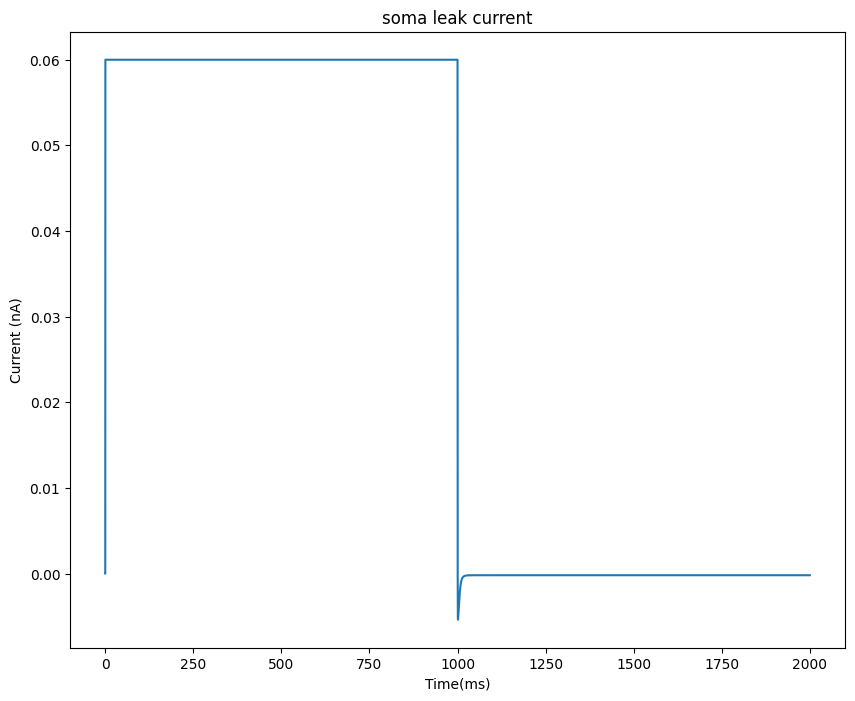

In [14]:
fig, axs = plt.subplots(1,1,figsize=(10, 8))
axs.plot(t_vec,soma_ileak_vec) #plotting time vs current
axs.set_title(str(soma) + ' leak current')
axs.set_xlabel('Time(ms)')
axs.set_ylabel('Current (nA)')
plt.show()

# Conclusion
You should now know how NEURON simulates a neuron, how to create a single cell model within NEURON, and how to use NEURON to conduct experiments/simulations of your own. For more help on how to use NEURON, click [here](http://web.mit.edu/neuron_v7.4/nrntuthtml/tutorial/tutA.html) and [here.](https://nrn.readthedocs.io/en/latest/tutorials/scripting-neuron-basics.html)